#### 자동차 연비 분석 및 예측

1. 데이터 불러오기

In [1]:
import urllib.request

urllib.request.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', 'auto_mpg.csv')

('auto_mpg.csv', <http.client.HTTPMessage at 0x2ee72556eb0>)

In [2]:
import warnings

warnings.filterwarnings(action='ignore')

In [3]:
# re(정규표현식) => \s: 화이트스페이스, \S: 제외한 어쩌구
import pandas as pd

mpgDf = pd.read_csv('auto_mpg.csv', header=None, sep='\s+')

In [4]:
mpgDf.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


2. 데이터 전처리

In [5]:
mpgDf.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                 'model year', 'origin', 'car name']

In [6]:
mpgDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
# 결측치 확인
mpgDf.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [8]:
import numpy as np

mpgDf.horsepower.replace('?', np.nan, inplace=True)

In [9]:
mpgDf = mpgDf.dropna(axis=0, how='any')

In [10]:
mpgDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


<AxesSubplot:>

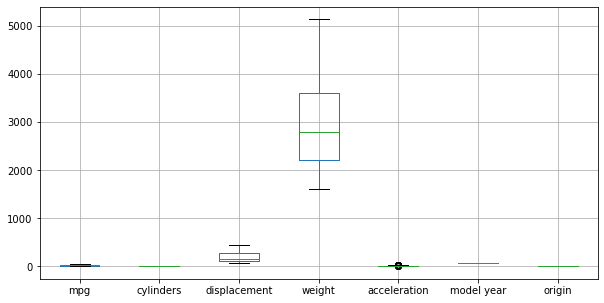

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
mpgDf.boxplot()

In [12]:
mpgDf.horsepower = mpgDf.horsepower.astype('float')

In [13]:
mpgDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [14]:
mpgDf.insert(1,'Km/L',0.425144*mpgDf['mpg'])# insert(넣을 위치, 칼럼명, 값)

In [15]:
mpgDf.head()

,mpg,Km/L,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,7.652592,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,6.377160,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,7.652592,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,6.802304,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,7.227448,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [16]:
originLabel=mpgDf.origin.replace({1:'USA',2:'EU',3:'JPA'})
# DF에 컬럼 추가
mpgDf.insert(9,'origin label',originLabel)

In [17]:
mpgDf.head()

,mpg,Km/L,cylinders,displacement,horsepower,weight,acceleration,model year,origin,origin label,car name
0,18.0,7.652592,8,307.0,130.0,3504.0,12.0,70,1,USA,chevrolet chevelle malibu
1,15.0,6.377160,8,350.0,165.0,3693.0,11.5,70,1,USA,buick skylark 320
2,18.0,7.652592,8,318.0,150.0,3436.0,11.0,70,1,USA,plymouth satellite
3,16.0,6.802304,8,304.0,150.0,3433.0,12.0,70,1,USA,amc rebel sst
4,17.0,7.227448,8,302.0,140.0,3449.0,10.5,70,1,USA,ford torino


In [18]:
# horsepower 컬럼 타입 변경 int 연속형 => 범주형 category 변환
# 구간의 라벨 설정 => horsepower_low, horsepower_normal, horsepower_high
mpgDf['horsepower_label']=pd.cut(x=mpgDf.horsepower,bins=3,
       labels=['horsepower_low','horsepower_normal','horsepower_high'],
       include_lowest=True) # 새로운 칼럼 만들어 지정, 뒤에 넣어줌

In [19]:
mpgDf['horsepower_label'].astype('category')
mpgDf.dtypes

mpg                  float64
Km/L                 float64
cylinders              int64
displacement         float64
horsepower           float64
weight               float64
acceleration         float64
model year             int64
origin                 int64
origin label          object
car name              object
horsepower_label    category
dtype: object

In [20]:
mpgDf.head()

,mpg,Km/L,cylinders,displacement,horsepower,weight,acceleration,model year,origin,origin label,car name,horsepower_label
0,18.0,7.652592,8,307.0,130.0,3504.0,12.0,70,1,USA,chevrolet chevelle malibu,horsepower_normal
1,15.0,6.377160,8,350.0,165.0,3693.0,11.5,70,1,USA,buick skylark 320,horsepower_normal
2,18.0,7.652592,8,318.0,150.0,3436.0,11.0,70,1,USA,plymouth satellite,horsepower_normal
3,16.0,6.802304,8,304.0,150.0,3433.0,12.0,70,1,USA,amc rebel sst,horsepower_normal
4,17.0,7.227448,8,302.0,140.0,3449.0,10.5,70,1,USA,ford torino,horsepower_normal


In [21]:
# horsepower 컬럼의 One-Hot-Encoding 변환 => pd.get_dummies()
oneHot=pd.get_dummies(mpgDf['horsepower_label'])

In [22]:
mpgDf=pd.concat([mpgDf,oneHot],axis=1)
mpgDf.head()

,mpg,Km/L,cylinders,displacement,horsepower,weight,acceleration,model year,origin,origin label,car name,horsepower_label,horsepower_low,horsepower_normal,horsepower_high
0,18.0,7.652592,8,307.0,130.0,3504.0,12.0,70,1,USA,chevrolet chevelle malibu,horsepower_normal,0,1,0
1,15.0,6.377160,8,350.0,165.0,3693.0,11.5,70,1,USA,buick skylark 320,horsepower_normal,0,1,0
2,18.0,7.652592,8,318.0,150.0,3436.0,11.0,70,1,USA,plymouth satellite,horsepower_normal,0,1,0
3,16.0,6.802304,8,304.0,150.0,3433.0,12.0,70,1,USA,amc rebel sst,horsepower_normal,0,1,0
4,17.0,7.227448,8,302.0,140.0,3449.0,10.5,70,1,USA,ford torino,horsepower_normal,0,1,0


- 정규화

In [23]:
# 수치형인 거 다 정규화
# (3-3-1) 방법: 컬럼의 최대값의 절대값으로 전체 데이터 나누기

div_list = []

newDF=pd.DataFrame()# 새로운 DF 객체 생성
for i in range(1, 8): # if문 넣어도 될 것 같음, 컬럼명 빼오기 추가
    div_list.append(abs(mpgDf.iloc[:,i].max()))
    newDF[i]=mpgDf.iloc[:,i]/abs(mpgDf.iloc[:,i].max())
newDF.columns=['reKm/L','recylinders','redisplacement','rehorsepower','reweight','reacceleration','remodel_year']

In [24]:
newDF.head()

,reKm/L,recylinders,redisplacement,rehorsepower,reweight,reacceleration,remodel_year
0,0.386266,1.0,0.674725,0.565217,0.681712,0.483871,0.853659
1,0.321888,1.0,0.769231,0.717391,0.718482,0.463710,0.853659
2,0.386266,1.0,0.698901,0.652174,0.668482,0.443548,0.853659
3,0.343348,1.0,0.668132,0.652174,0.667899,0.483871,0.853659
4,0.364807,1.0,0.663736,0.608696,0.671012,0.423387,0.853659


3. 모델 생성 및 학습 및 평가

- 선형회귀

In [25]:
# 종속변수: 연비
from sklearn.linear_model import LinearRegression

In [26]:
data = newDF.iloc[:,1:]
target = newDF.iloc[:,0]

In [27]:
# 학습용/테스트용 데이터 분리 => 8:2
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
                                                data, target, test_size=0.2, random_state=42)

In [28]:
train_input.shape, train_target.shape

((313, 6), (313,))

In [29]:
model = LinearRegression()

In [30]:
# 학습
model.fit(train_input, train_target)

LinearRegression()

In [31]:
print('train score: {}, test score: {}'.format(round(model.score(train_input, train_target),3), round(model.score(test_input, test_target),3)))

train score: 0.811, test score: 0.794


- 다중 회귀

In [32]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)

In [33]:
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(313, 27)


In [34]:
#PolynomialFeatures로 9개의 특성이 어떻게 만들어졌는지 확인
poly.get_feature_names()
#test set도 다중회귀식으로 만들기
test_poly = poly.transform(test_input)

In [35]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [36]:
print('train score: {}, test score: {}'.format(round(lr.score(train_poly, train_target),3), round(lr.score(test_poly, test_target),3)))

train score: 0.89, test score: 0.855


- 최적의 모델 찾기

In [37]:
from sklearn.utils import all_estimators

models = all_estimators(type_filter='regressor')
scores = []
names = []

for name, model in models:
    try:
        # 모델 객체 생성
        md = model()
        # 학습
        md.fit(train_input, train_target)
        # 평가
        result1 = md.score(train_input, train_target)
        result2 = md.score(test_input, test_target)
        names.append(name)
        scores.append((name, np.round(result1,3), np.round(result2,3)))
    except:
        pass

In [38]:
scoresDf = pd.DataFrame(scores, columns=['model', 'train_score', 'test_score'])
scoresDf.head()

,model,train_score,test_score
0,ARDRegression,0.810,0.794
1,AdaBoostRegressor,0.907,0.835
2,BaggingRegressor,0.976,0.901
3,BayesianRidge,0.811,0.794
4,CCA,0.744,0.635


In [39]:
scoresDf.sort_values(by='test_score', ascending=False).head(10)

,model,train_score,test_score
10,ExtraTreesRegressor,1.000,0.903
2,BaggingRegressor,0.976,0.901
38,RandomForestRegressor,0.981,0.885
13,GradientBoostingRegressor,0.970,0.884
14,HistGradientBoostingRegressor,0.963,0.876
28,NuSVR,0.890,0.872
1,AdaBoostRegressor,0.907,0.835
16,KNeighborsRegressor,0.885,0.834
9,ExtraTreeRegressor,1.000,0.832
42,SVR,0.869,0.818


- 랜덤 포레스트

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rf = RandomForestRegressor()

In [42]:
rf.fit(train_input, train_target)

RandomForestRegressor()

In [43]:
print('train score: {}, test score: {}'.format(round(rf.score(train_input, train_target),3), round(rf.score(test_input, test_target),3)))

train score: 0.98, test score: 0.889


In [44]:
rf2 = RandomForestRegressor(random_state=42, max_depth=None, min_samples_split=5, min_samples_leaf=5, max_features=0.5)
rf2.fit(train_input, train_target)
print('train score: {}, test score: {}'.format(round(rf2.score(train_input, train_target),3), round(rf2.score(test_input, test_target),3)))

train score: 0.918, test score: 0.861


- NuSVR (선택)

In [45]:
from sklearn.svm import NuSVR

In [46]:
nu = NuSVR()

In [47]:
nu.fit(train_input, train_target)

NuSVR()

In [48]:
print('train score: {}, test score: {}'.format(round(nu.score(train_input, train_target),3), round(nu.score(test_input, test_target),3)))

train score: 0.89, test score: 0.872


In [49]:
nu2 = NuSVR(C=6)
nu2.fit(train_input, train_target)
print('train score: {}, test score: {}'.format(round(nu2.score(train_input, train_target),3), round(nu2.score(test_input, test_target),3)))

train score: 0.903, test score: 0.892


In [50]:
mpgDf.describe()

,mpg,Km/L,cylinders,displacement,horsepower,weight,acceleration,model year,origin,horsepower_low,horsepower_normal,horsepower_high
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,9.967892,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,0.655612,0.262755,0.081633
std,7.805007,3.318252,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,0.475775,0.440693,0.274154
min,9.000000,3.826296,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000,0.000000,0.000000
25%,17.000000,7.227448,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,0.000000,0.000000,0.000000
50%,22.750000,9.672026,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,1.000000,0.000000,0.000000
75%,29.000000,12.329176,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,1.000000,1.000000,0.000000
max,46.600000,19.811710,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000,1.000000,1.000000


In [51]:
newDF.head()

,reKm/L,recylinders,redisplacement,rehorsepower,reweight,reacceleration,remodel_year
0,0.386266,1.0,0.674725,0.565217,0.681712,0.483871,0.853659
1,0.321888,1.0,0.769231,0.717391,0.718482,0.463710,0.853659
2,0.386266,1.0,0.698901,0.652174,0.668482,0.443548,0.853659
3,0.343348,1.0,0.668132,0.652174,0.667899,0.483871,0.853659
4,0.364807,1.0,0.663736,0.608696,0.671012,0.423387,0.853659


In [52]:
# 새로운 데이터로 예측
test = [9, 3.3, 104.5, 46.333, 2008.08, 13.2, 82]

In [53]:
for i in range(1,len(test)):
    test[i] = test[i] / div_list[i]

In [54]:
test = test[1:]

In [55]:
print('예측 Km/L: {}'.format(nu2.predict([test])[0]*div_list[0]))

예측 Km/L: 13.591657690454653


---

[1] 모델 구성

In [59]:
newDF.head()

,reKm/L,recylinders,redisplacement,rehorsepower,reweight,reacceleration,remodel_year
0,0.386266,1.0,0.674725,0.565217,0.681712,0.483871,0.853659
1,0.321888,1.0,0.769231,0.717391,0.718482,0.463710,0.853659
2,0.386266,1.0,0.698901,0.652174,0.668482,0.443548,0.853659
3,0.343348,1.0,0.668132,0.652174,0.667899,0.483871,0.853659
4,0.364807,1.0,0.663736,0.608696,0.671012,0.423387,0.853659


In [56]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [57]:
model = Sequential(name='auto_mpg')

In [62]:
# 첫번째 층은 반드시 입력 정보 파라미터 설정 => input_shape=() 튜플 타입, input_dim=숫자
l1 = Dense(64, activation='relu', input_shape=(6,)) # 무조건 1차원

In [63]:
l2 = Dense(64, activation='relu') # 히든레이어에서 기울기 손실 방지

In [64]:
l3 = Dense(1)

In [65]:
model.add(l1)
model.add(l2)
model.add(l3)

In [66]:
# 모델 구성확인 => summary()
model.summary()

Model: "auto_mpg"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


[2] 모델 생성

In [67]:
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

In [68]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(newDF.iloc[:, 1:], newDF.iloc[:,0], test_size=0.2, random_state=42)

In [69]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((313, 6), (79, 6), (313,), (79,))

[3] 모델 학습

In [70]:
hist = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 23ms/step - loss: 0.0675 - mae: 0.2094 - mse: 0.0675 - val_loss: 0.0374 - val_mae: 0.1582 - val_mse: 0.0374
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0268 - mae: 0.1361 - mse: 0.0268 - val_loss: 0.0104 - val_mae: 0.0742 - val_mse: 0.0104
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0141 - mae: 0.0879 - mse: 0.0141 - val_loss: 0.0089 - val_mae: 0.0759 - val_mse: 0.0089
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0106 - mae: 0.0811 - mse: 0.0106 - val_loss: 0.0081 - val_mae: 0.0746 - val_mse: 0.0081
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0098 - mae: 0.0775 - mse: 0.0098 - val_loss: 0.0080 - val_mae: 0.0720 - val_mse: 0.0080
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0089 - mae: 0.0716 - mse: 0.0089 - val_loss: 0.0065 - val_mae: 0.0634 - val_mse: 0.0065
Epoch 7/100
10/10 [==

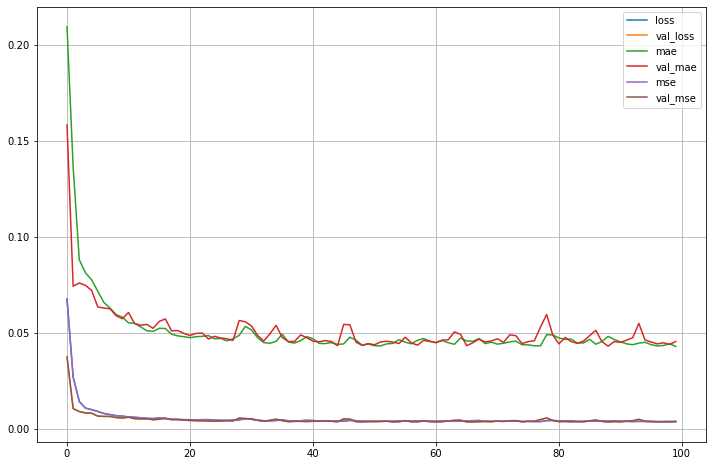

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.legend(['loss','val_loss', 'mae','val_mae','mse','val_mse'])
plt.grid()
plt.show()

[4] 모델 평가

In [95]:
model.evaluate(test_X, test_y)

3/3 [==============================] - 0s 1ms/step - loss: 0.0037 - mae: 0.0454 - mse: 0.0037


[0.003703364171087742, 0.045359738171100616, 0.003703364171087742]

[4]-1 위에서 썼던 NuSVR 모델 평가  

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [100]:
print('mae: {}, mse: {}'.format(mean_absolute_error(test_y, nu2.predict(test_X)), mean_squared_error(test_y, nu2.predict(test_X))))

mae: 0.038047791400937496, mse: 0.0025441527289205893


[5] 모델 예측

In [94]:
print('예측 Km/L: {}'.format(model.predict([test])[0]*div_list[0]))

예측 Km/L: [15.706531]
